In [1]:
import requests
import pandas as pd
import io
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON
from matplotlib.colors import ListedColormap

df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")

df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


In [2]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]

#Split Date and time into separate columns

new_csv_data_df['Date'] = pd.to_datetime(new_csv_data_df['Case1']).dt.date
new_csv_data_df['Time'] = pd.to_datetime(new_csv_data_df['Case1']).dt.time


#create new dataframe with new date date

new_csv_data_df1 = new_csv_data_df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Date"]]
new_csv_data_df1.head()

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020-07-15
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020-07-15
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020-07-15


In [3]:
#Create new csv
new_csv_data_df1.to_csv ("new_covid_dataframe.csv")

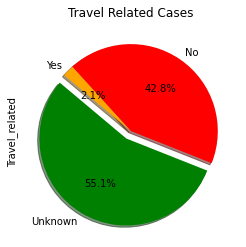

In [4]:
#Compare travel-related cases to non-travel-related cases (Not done yet) (Chika)
travel_vs_nontravel = new_csv_data_df1["Travel_related"].value_counts()
#travel_vs_nontravel

colors = ['green', 'red', 'orange']
explode = (0.1, 0, 0)
travel_vs_nontravel.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Cases")
plt.show()


In [5]:
hosp_filter = new_csv_data_df1["Hospitalized"] == "YES"
hosp_filter_df = new_csv_data_df1[hosp_filter]
hosp_filter_df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,YES,2020-07-15
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,YES,2020-07-15
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,YES,2020-07-15
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,YES,2020-03-07
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,YES,2020-03-07
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,YES,2020-03-05
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,YES,2020-03-04


In [6]:
#Total Hospitalized 
hosp_count = hosp_filter_df["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_hospitalized = hosp_filter_df['Age'].mean()
Median_age_hospitalized = hosp_filter_df['Age'].median()

hosp_age_data_df = pd.DataFrame({"Total Number Hospitalized": hosp_count, 
                      "Average Age": [Average_age_hospitalized], "Median Age": [Median_age_hospitalized]})

hosp_age_data_df["Average Age"] = hosp_age_data_df["Average Age"].map("{0:,.3}years".format)
hosp_age_data_df["Median Age"] = hosp_age_data_df["Median Age"].map("{0:,.3}years".format)
hosp_age_data_df

,Total Number Hospitalized,Average Age,Median Age
YES,20154,62.6years,65.0years


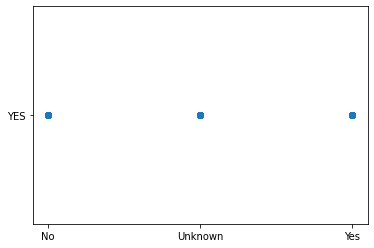

In [7]:
plt.scatter(hosp_filter_df.iloc[:,6],hosp_filter_df.iloc[:,7])
plt.show()


In [8]:
#Calcalate percentage hospitalized by age group 
#Calculate total hospitalized 
Total_hospitalized = hosp_filter_df["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
demo_age_grouped = hosp_filter_df.groupby("Age_group")
total_hospitalize_count = demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
age_percentage = (total_hospitalize_count/Total_hospitalized) * 100

#Create a dataframe for values
Age_demographic_summary = pd.DataFrame({"Total Count": total_hospitalize_count, 
                                          "Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
Age_demographic_summary



,,Total Count,Percentage of hospitalized patients
Age_group,Hospitalized,,
0-4 years,YES,98,0.486%
15-24 years,YES,497,2.47%
25-34 years,YES,1259,6.25%
35-44 years,YES,1876,9.31%
45-54 years,YES,2696,13.4%
5-14 years,YES,74,0.367%
55-64 years,YES,3544,17.6%
65-74 years,YES,3871,19.2%
75-84 years,YES,3558,17.7%


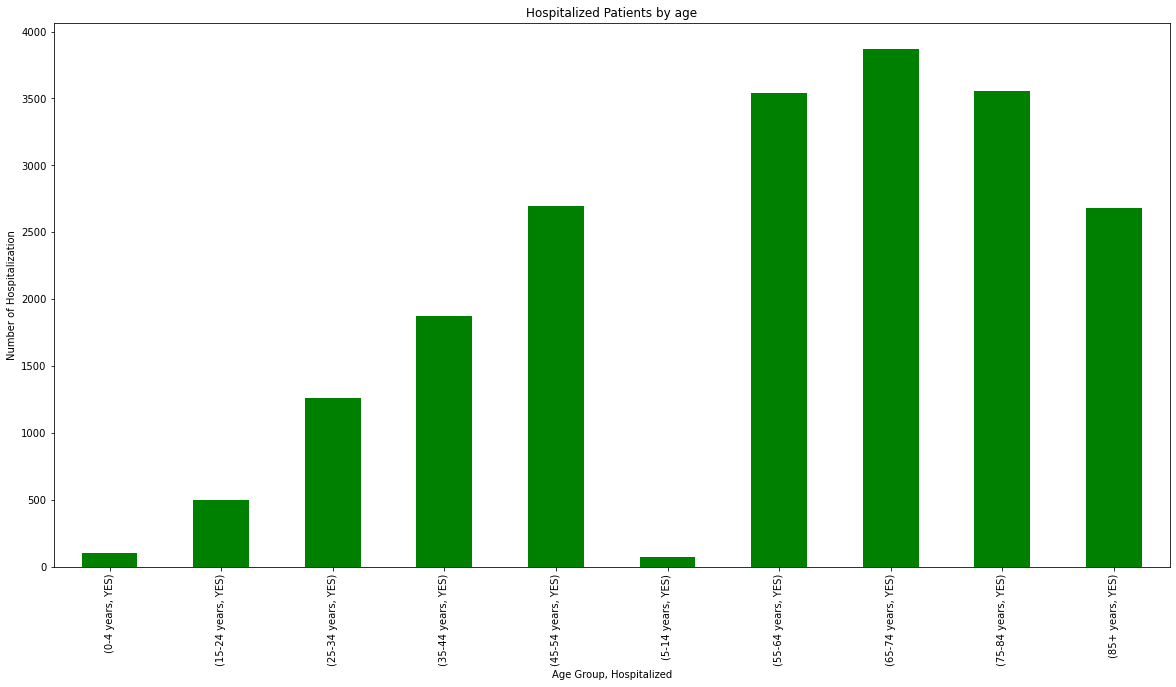

In [9]:
#Hospitalization vs age plot

Age_demographic_summary["Total Count"].plot(kind= "bar", color = "g", figsize=(20, 10))

plt.title("Hospitalized Patients by age")
plt.xlabel("Age Group, Hospitalized")
plt.ylabel("Number of Hospitalization")

plt.show()


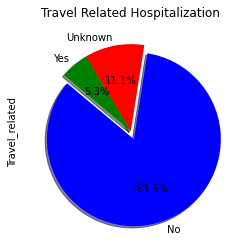

In [10]:
#Compare travel-related hospitalization to non-travel-related hospitalization (Not done yet) (Chika)
travel_vs_nontravel_hosp = hosp_filter_df["Travel_related"].value_counts()

#Plottravel_vs_nontravel

colors = ['blue', 'red', 'green']
explode = (0.1, 0, 0)
travel_vs_nontravel_hosp.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Hospitalization")
plt.show()

In [11]:
#Create new dataframe for date and hospitalization
sec_hosp_data_df = hosp_filter_df.filter(["County",'Hospitalized', "Age", "Age_group", "Gender", 'Date'], axis=1)
sec_hosp_data_df


,County,Hospitalized,Age,Age_group,Gender,Date
11,Broward,YES,59.0,55-64 years,Female,2020-07-15
13,Escambia,YES,60.0,55-64 years,Male,2020-07-15
144,Putnam,YES,66.0,65-74 years,Male,2020-07-15
215,Dade,YES,43.0,35-44 years,Male,2020-07-15
354,Volusia,YES,66.0,65-74 years,Male,2020-07-15
...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04


In [12]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

Before_start_date = "2020-01-01"
Before_end_date = '2020-05-03'

mask = (sec_hosp_data_df['Date'] > Before_start_date) & (sec_hosp_data_df['Date'] <= Before_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new.head(10)

,County,Hospitalized,Age,Age_group,Gender,Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03
279172,Dade,YES,87.0,85+ years,Male,2020-05-03
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03
279174,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03
279176,Collier,YES,88.0,85+ years,Female,2020-05-03
279179,Alachua,YES,45.0,45-54 years,Female,2020-05-03
279185,Broward,YES,85.0,85+ years,Male,2020-05-03
279187,Dade,YES,72.0,65-74 years,Male,2020-05-03


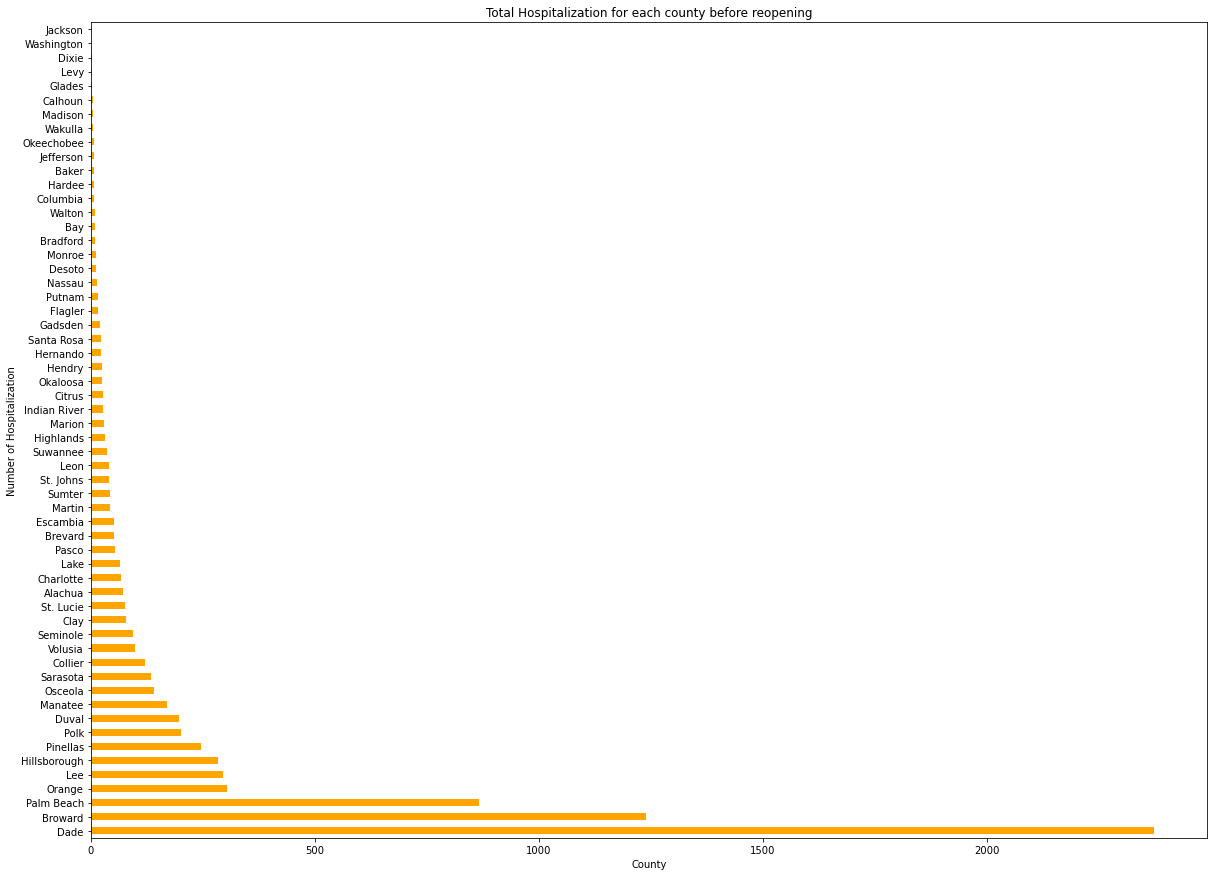

In [16]:
#Calculate hospitalization per county for before reopening and plot chart

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
my_colormap = ListedColormap(my_colors)

Before_hosp_county = hosp_filter_df_new["County"].value_counts().plot(kind= "barh", color = 'orange', figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county before reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()


In [40]:
#Average age of patients hospitalized before shut down


Avg_hosp_count = hosp_filter_df_new["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df = hosp_filter_df_new['Age'].mean()
Median_age_new_df = hosp_filter_df_new['Age'].median()

hosp_age_new_df = pd.DataFrame({"Total Hospitalized Before Reopening": Avg_hosp_count, 
                      "Average Age": [Average_age_new_df], "Median Age": [Median_age_new_df]})

hosp_age_new_df["Average Age"] = hosp_age_new_df["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df["Median Age"] = hosp_age_new_df["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df

,Total Hospitalized Before Reopening,Average Age,Median Age
YES,7865,64.7years,67.0years


In [17]:
#summary statistics table for mean, median, variance, standara deviation and SEM of age for each county
summary_stat_df = hosp_filter_df_new.groupby(["County"]).agg({"Age":["mean","median","var","std","sem"]})
summary_stat_df.head()

Age                                        
               mean median         var        std       sem
County                                                     
Alachua   62.888889   65.0  297.226917  17.240270  2.031785
Baker     67.250000   70.5  257.071429  16.033447  5.668680
Bay       62.700000   58.5  299.344444  17.301573  5.471238
Bradford  70.200000   77.5  425.511111  20.627921  6.523121
Brevard   65.352941   68.0  372.392941  19.297485  2.702188

In [57]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m")
hosp_filter_df_new

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,Hospitalized,Age,Age_group,Gender,Date,Case_Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03,05
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03,05
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03,05
279172,Dade,YES,87.0,85+ years,Male,2020-05-03,05
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03,05
...,...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07,03
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07,03
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05,03
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04,03


In [43]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

After_start_date = "2020-05-04"
After_end_date = '2020-07-15'

mask = (sec_hosp_data_df['Date'] > After_start_date) & (sec_hosp_data_df['Date'] <= After_end_date)

hosp_filter_df_new1 = sec_hosp_data_df.loc[mask]
hosp_filter_df_new1

,County,Hospitalized,Age,Age_group,Gender,Date
11,Broward,YES,59.0,55-64 years,Female,2020-07-15
13,Escambia,YES,60.0,55-64 years,Male,2020-07-15
144,Putnam,YES,66.0,65-74 years,Male,2020-07-15
215,Dade,YES,43.0,35-44 years,Male,2020-07-15
354,Volusia,YES,66.0,65-74 years,Male,2020-07-15
...,...,...,...,...,...,...
278541,Dade,YES,85.0,85+ years,Female,2020-05-05
278542,Dade,YES,92.0,85+ years,Male,2020-05-05
278545,Dade,YES,81.0,75-84 years,Male,2020-05-05
278573,Lee,YES,72.0,65-74 years,Male,2020-05-05


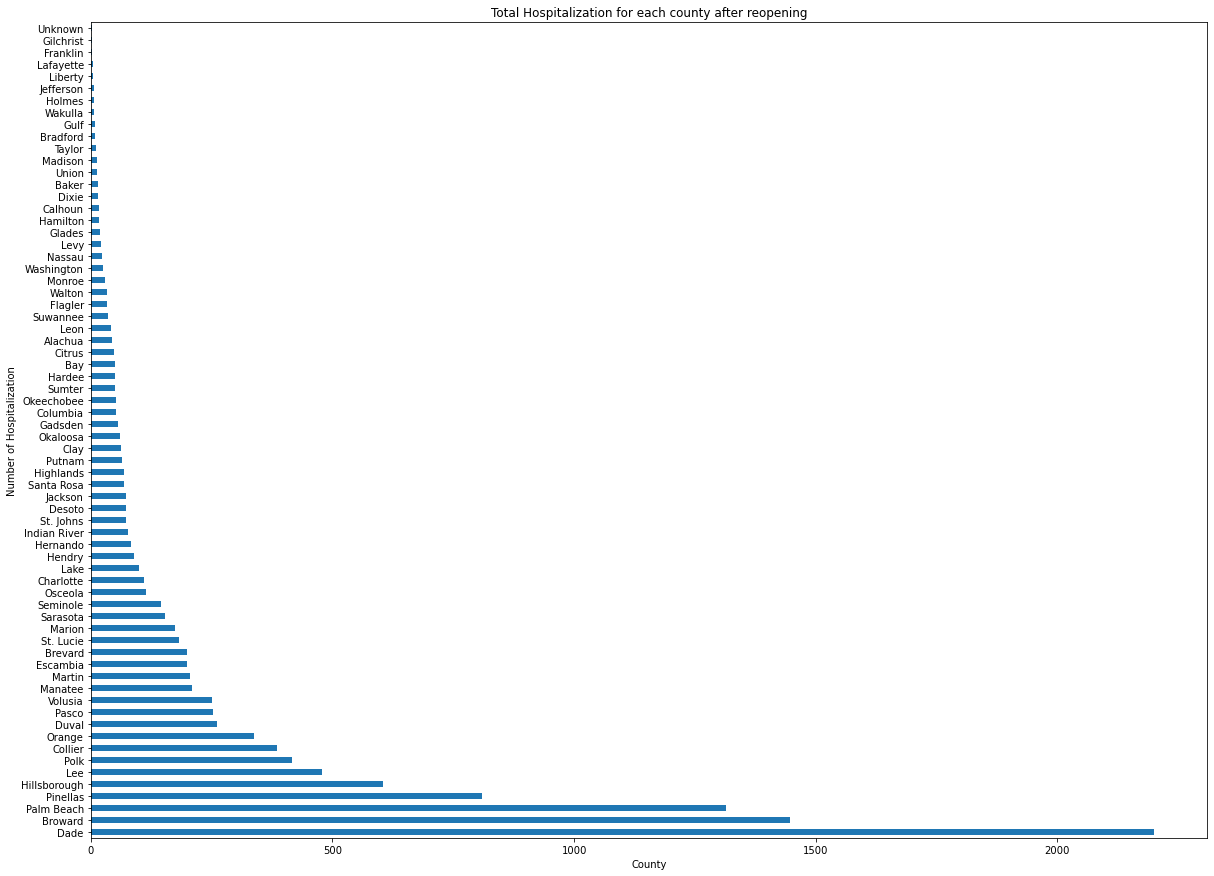

In [55]:
#Calculate hospitalization per county for before reopening 

#my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
#my_colormap = ListedColormap(my_colors)

After_hosp_county = hosp_filter_df_new1["County"].value_counts().plot(kind= "barh", figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county after reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()

In [45]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m-%d")
hosp_filter_df_new

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,Hospitalized,Age,Age_group,Gender,Date,Case_Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03,05-03
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03,05-03
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03,05-03
279172,Dade,YES,87.0,85+ years,Male,2020-05-03,05-03
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03,05-03
...,...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07,03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07,03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05,03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04,03-04


In [46]:
#Average age of patients hospitalized after reopening

Avg_hosp_count1 = hosp_filter_df_new1["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df1 = hosp_filter_df_new1['Age'].mean()
Median_age_new_df1 = hosp_filter_df_new1['Age'].median()


hosp_age_new_df1 = pd.DataFrame({"Total Hospitalized after reopening": Avg_hosp_count1, 
                      "Average Age": [Average_age_new_df1], "Median Age": [Median_age_new_df1]})

hosp_age_new_df1["Average Age"] = hosp_age_new_df1["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df1["Median Age"] = hosp_age_new_df1["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df1

,Total Hospitalized after reopening,Average Age,Median Age
YES,12158,61.2years,63.0years


In [ ]:
#Average hospitalization by month

#Average hospitalization by month

In [ ]:
#Avg hospitalization vs Avg case by month (Line Graph)

In [ ]:
#Hospitalization before reopening vs after reopening (Line Graph)